# Plotting the Housing Data

A good first step when working with any new data set is to do some exploratory data analysis, starting with a plots of the data. Let's download the data. There is some information about the [data set](https://archive.ics.uci.edu/ml/datasets/Housing) at the UCI ML repository. It's a good idea to take a look at the dataset description before proceeding.

In [1]:
%matplotlib inline

# Download the data, save to a file called "housing.data"
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

('housing.data', <httplib.HTTPMessage instance at 0x10a6a03f8>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience.

In [24]:
names = ["Crime", "Residential Zoned Land", "Non retail business acres", "Borders River", "Nitric Oxide Concentrates",
         "Average # of Rooms", "Age of House", "Distance to 5 Boston Employment Centers",
         "Index of Accessibility to Radial Highways", "Property Tax Rate per $10k", "Pupil-teacher ratio",
         "Proportion of blacks", "% lower status of Population", "Median House Value"]

## Loading the Data

Now let's use pandas to load the data into a data frame. Note that the data is space separated (rather than the more common comma separated data). Here are the first few lines:

```
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```

In [25]:
import pandas as pd

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

# Take a look at the first few rows
data.head()

,Crime,Residential Zoned Land,Non retail business acres,Borders River,Nitric Oxide Concentrates,Average # of Rooms,Age of House,Distance to 5 Boston Employment Centers,Index of Accessibility to Radial Highways,Property Tax Rate per $10k,Pupil-teacher ratio,Proportion of blacks,% lower status of Population,Median House Value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Knowledge Check:

How many rows are in the dataset?

In [5]:
# Compute the number of rows
len(data.index)

506

## Plotting the Data

We are interested in the house values, given in column "MEDV" as a target for modeling. By plotting each of the other columns against "MEDV" we can get a sense of which variables may be correlated.

There are many ways we can plot the data, using `pandas`, `matplotlib`, or `seaborn`. In any case, it's nice to import `seaborn` for the improved styling. Let's try using `pandas` first to make a scatter plot of crime (column "CRIM") versus house value ("MEDV").

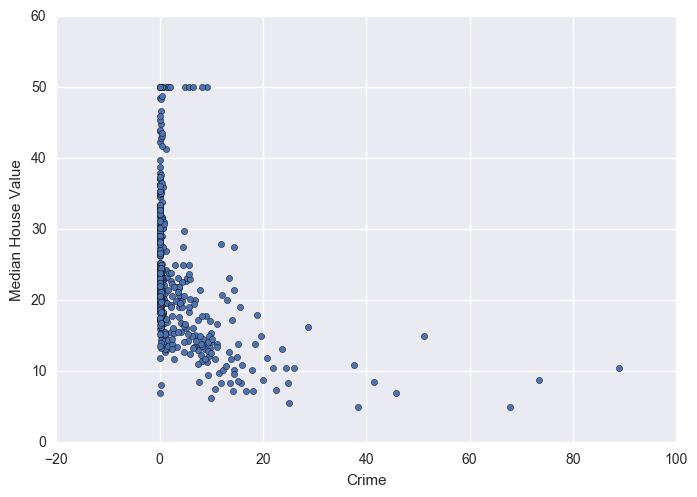

In [26]:
import seaborn as sns

# Plot using pandas
data.plot(x='Crime', y='Median House Value', kind ='scatter')

It looks like there is a relationship. While houses in low crime areas can have a wide range of values, houses in high crime areas appear to have lower values.

Knowledge checks:
* How do we select a column of data from a pandas DataFrame?
* Let's make the same plot with matplotlib.

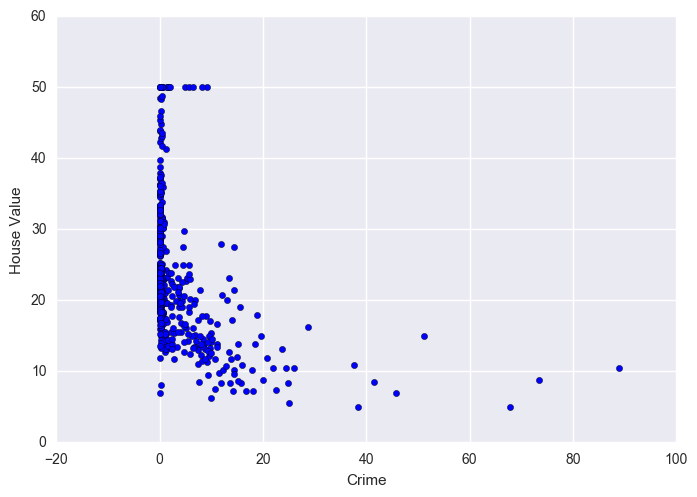

In [27]:
# Knowledge Check Solution
from matplotlib import pyplot as plt

# Plot using matplotlib
plt.scatter(data["Crime"], data["Median House Value"])
plt.xlabel("Crime")
plt.ylabel("House Value")

### Exercises

Exercise 1: Using `pandas` or `matplotlib` plot the remaining variables against "MEDV" and discuss the relationships you find. Question: Which variables seem to correlate well?

### Bonus Exercises

Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) to make similar plots.

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?

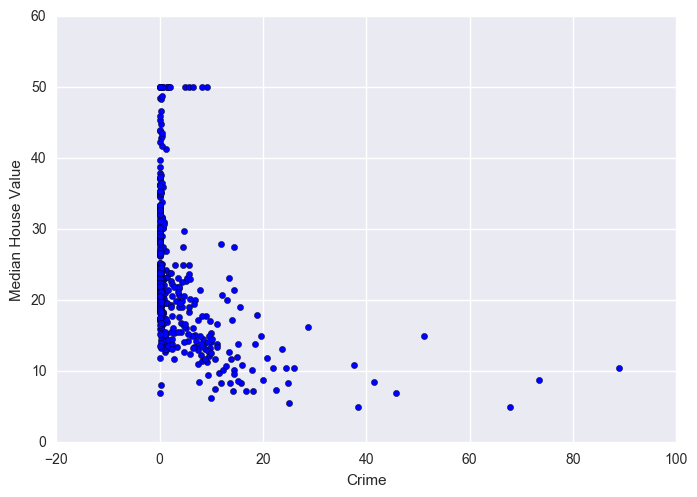

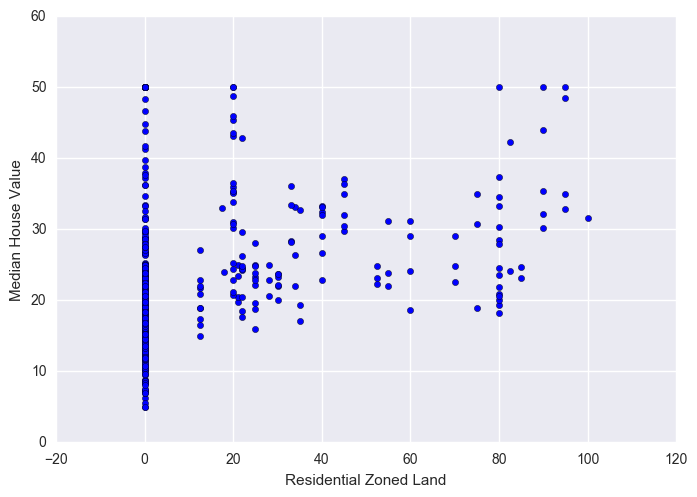

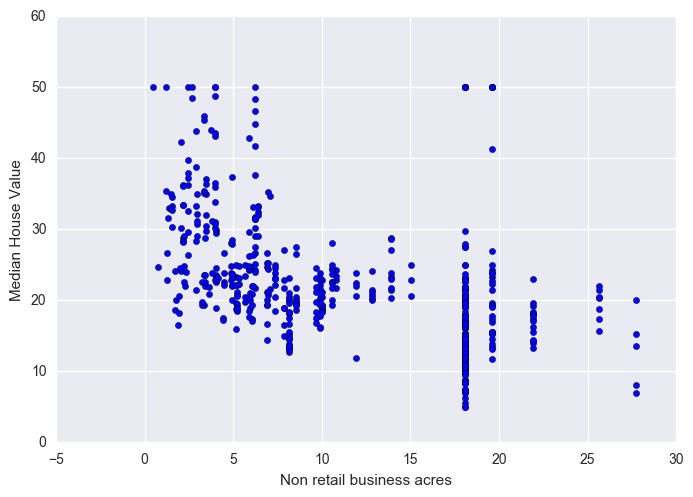

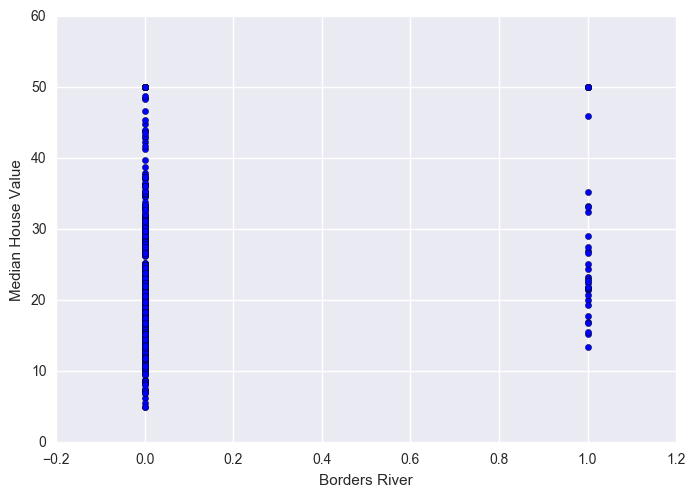

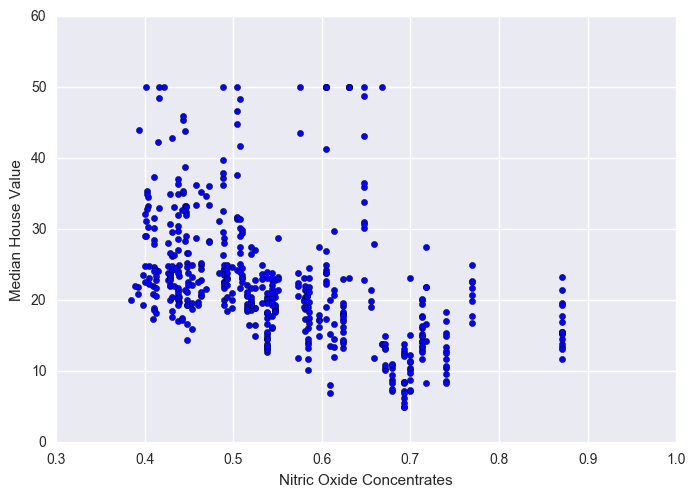

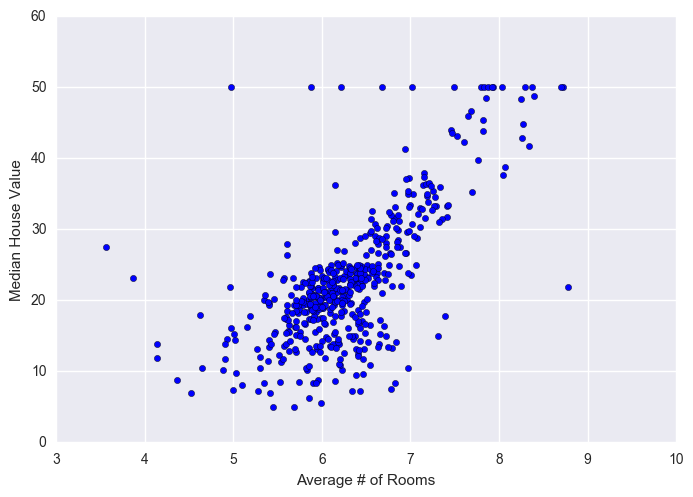

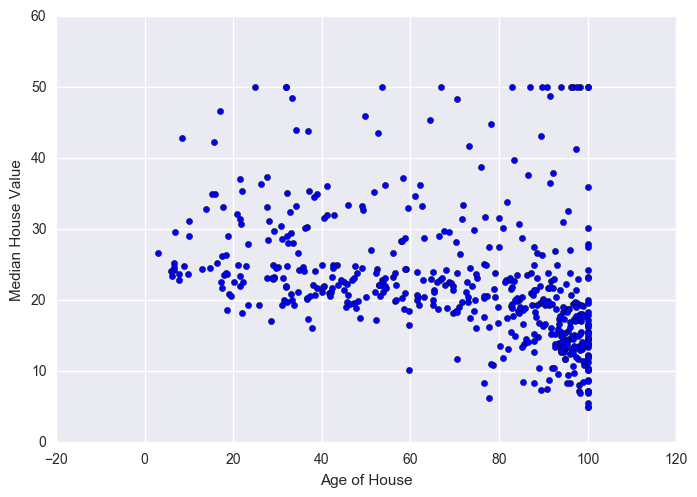

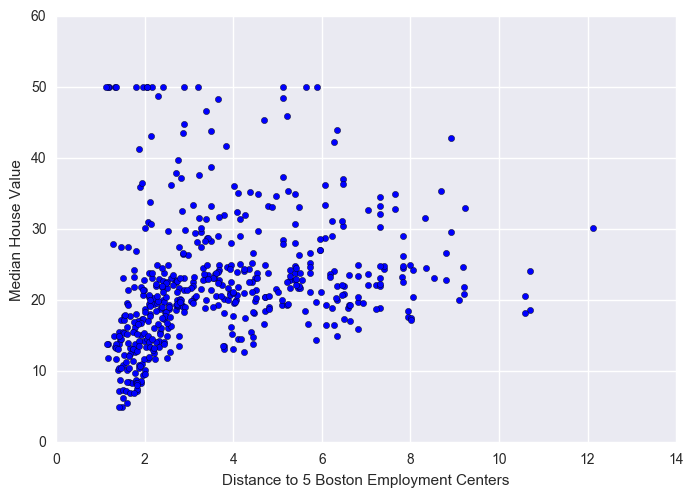

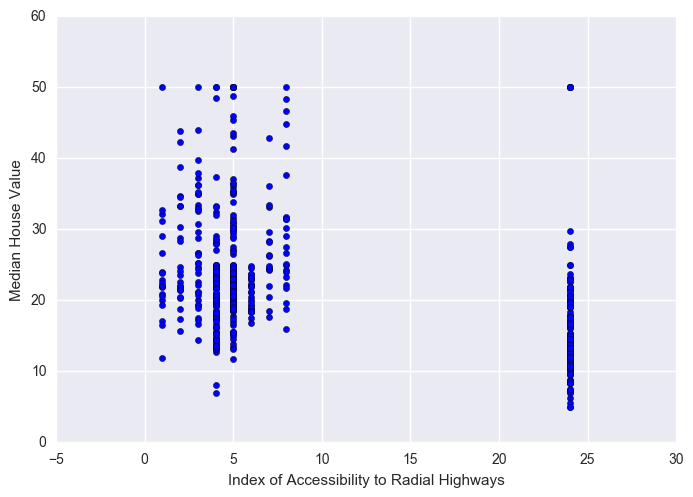

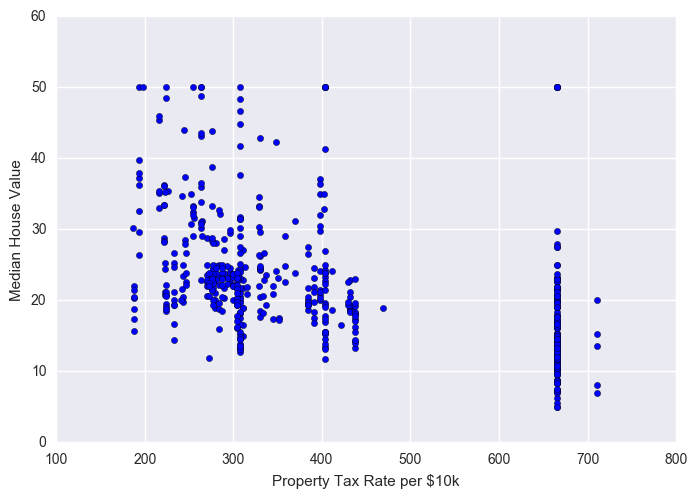

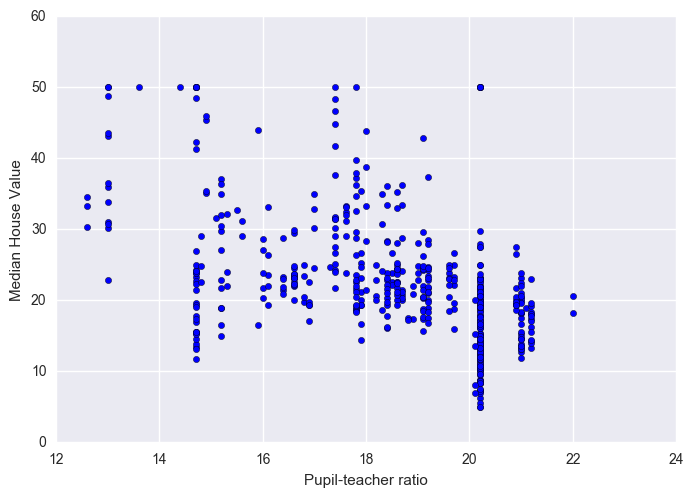

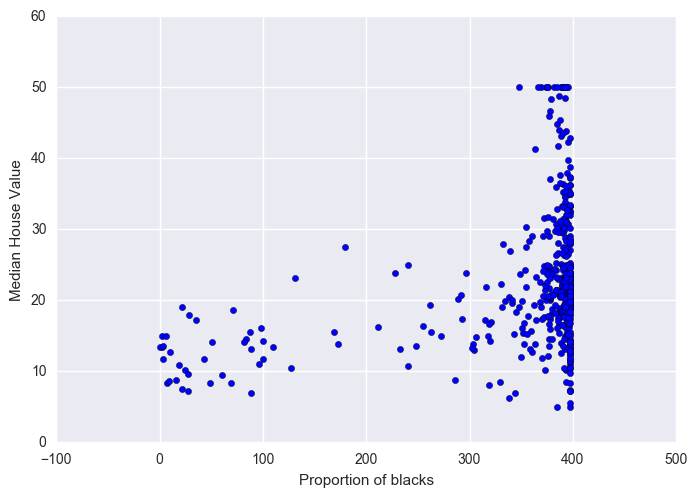

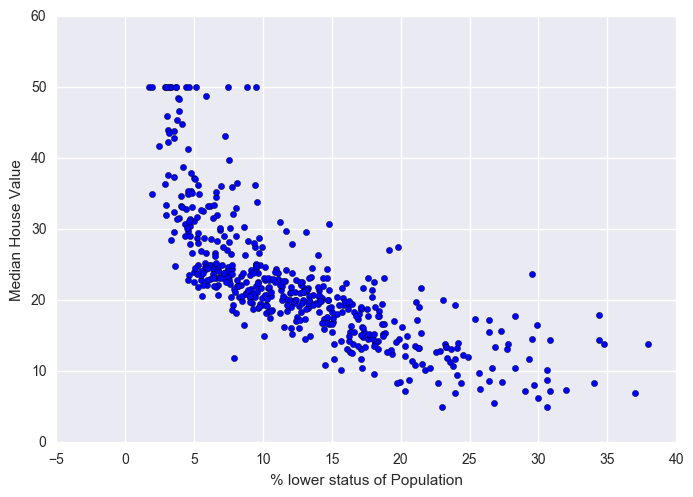

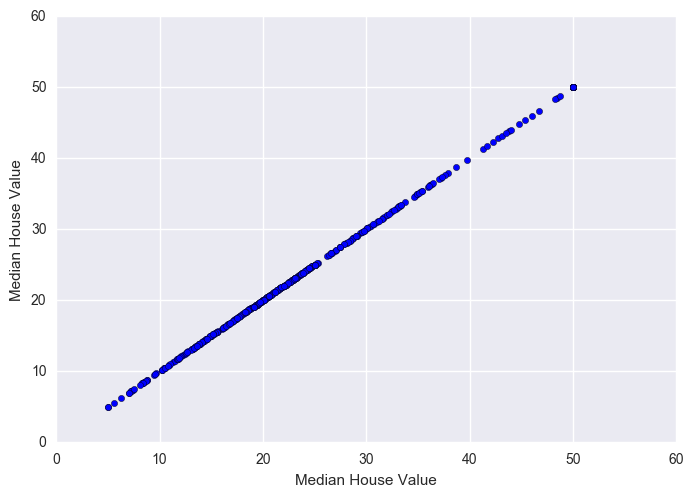

In [28]:
for name in names:
    plt.scatter(data[name], data['Median House Value'])
    plt.xlabel(name)
    plt.ylabel('Median House Value')
    plt.show()

- There is a positive correlation between house value and number of rooms
- There appears to be somewhat of a positive correlation for house value and weighted distances to 5 Boston employment centers, although not very strong
- There is a negative correlation between house value and % lower status of the population

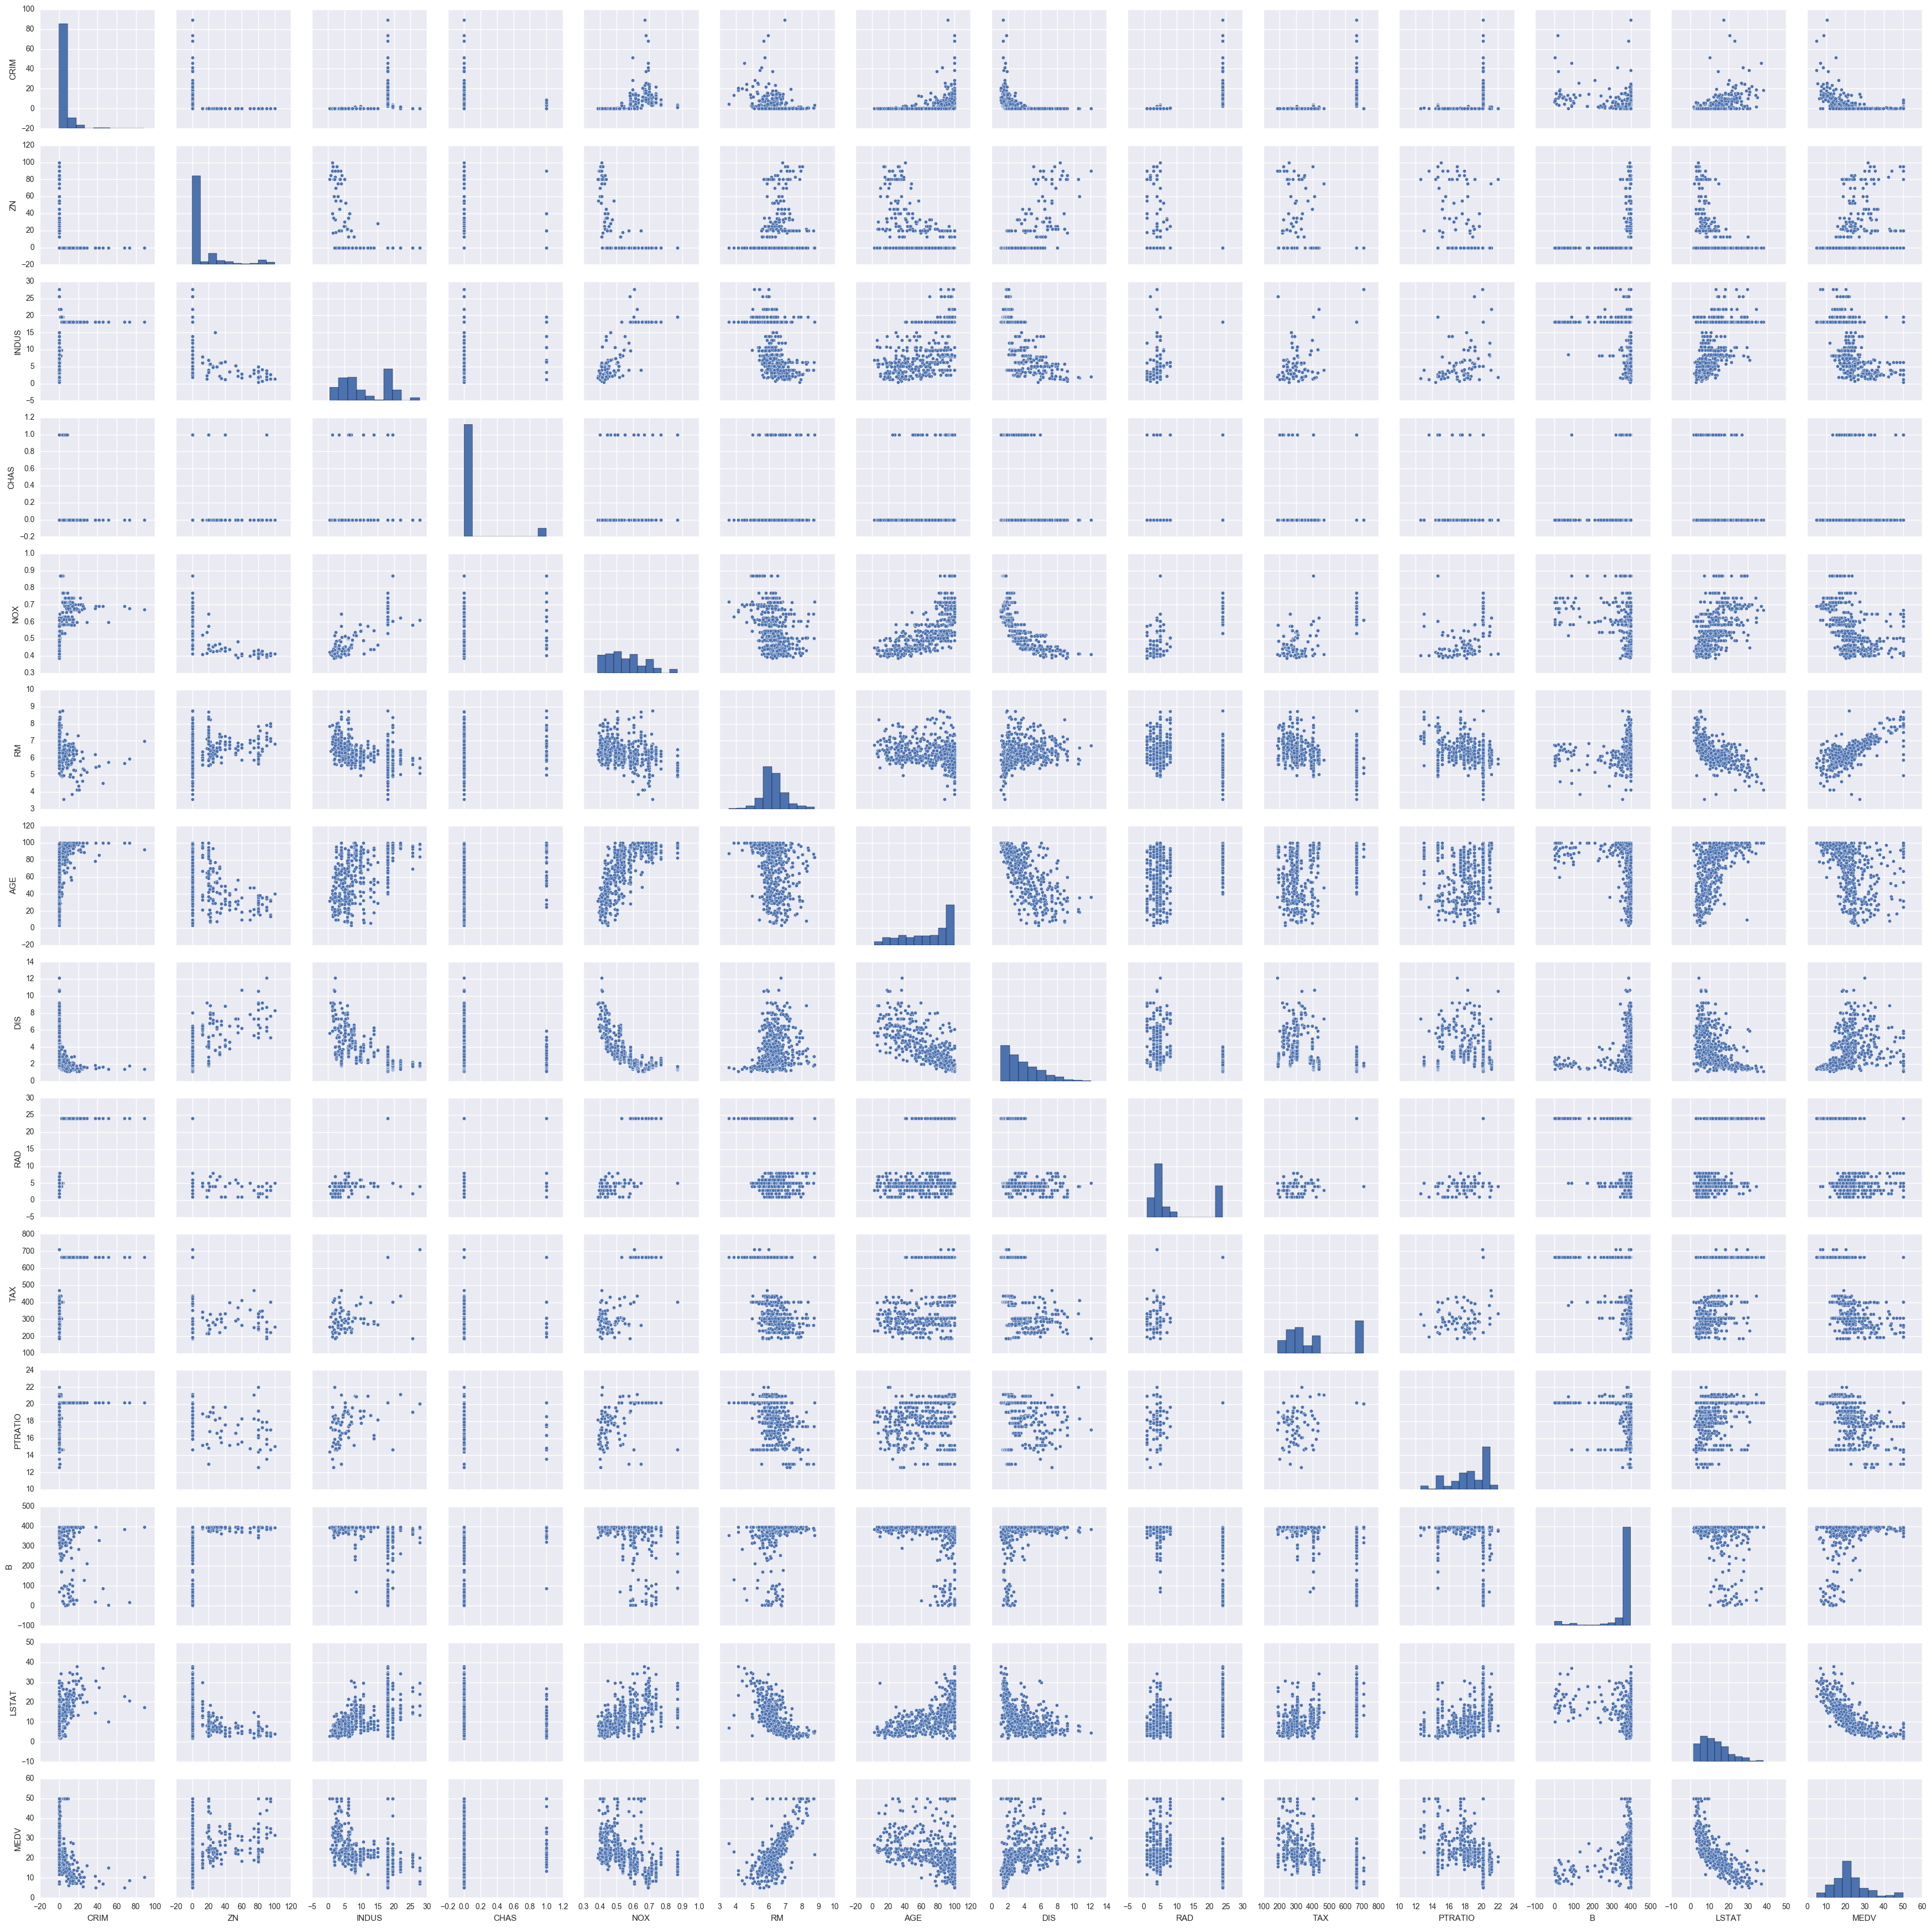

In [8]:
sns.pairplot(data)

- negative correlation between:
    - lstat and room
    - dis and indus
    - dis and nox
    - dis and age
    